In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [22]:
url = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=CPIAUCNS"
cpi_data = pd.read_csv(url, parse_dates=['DATE'], index_col='DATE')

# Filter the last 10 years of data
cpi_data = cpi_data.loc[cpi_data.index >= cpi_data.index.max() - pd.DateOffset(years=10)]

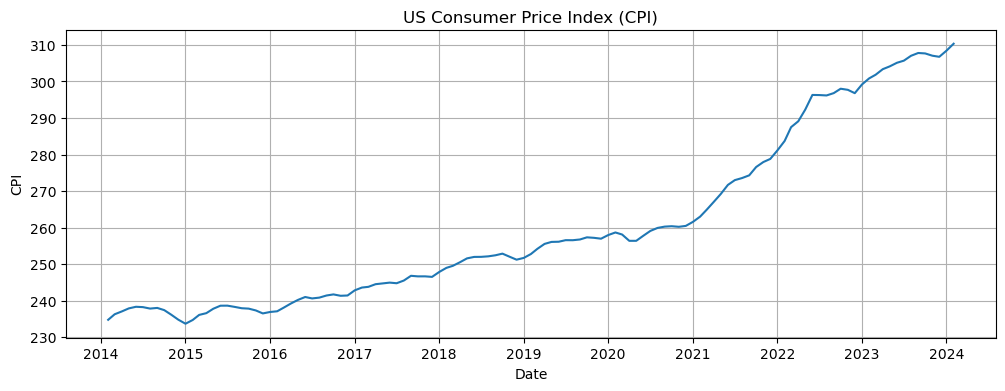

In [23]:
# Plotting the data
plt.figure(figsize=(12, 4))
plt.plot(cpi_data)
plt.title('US Consumer Price Index (CPI)')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.grid(True)
plt.show()

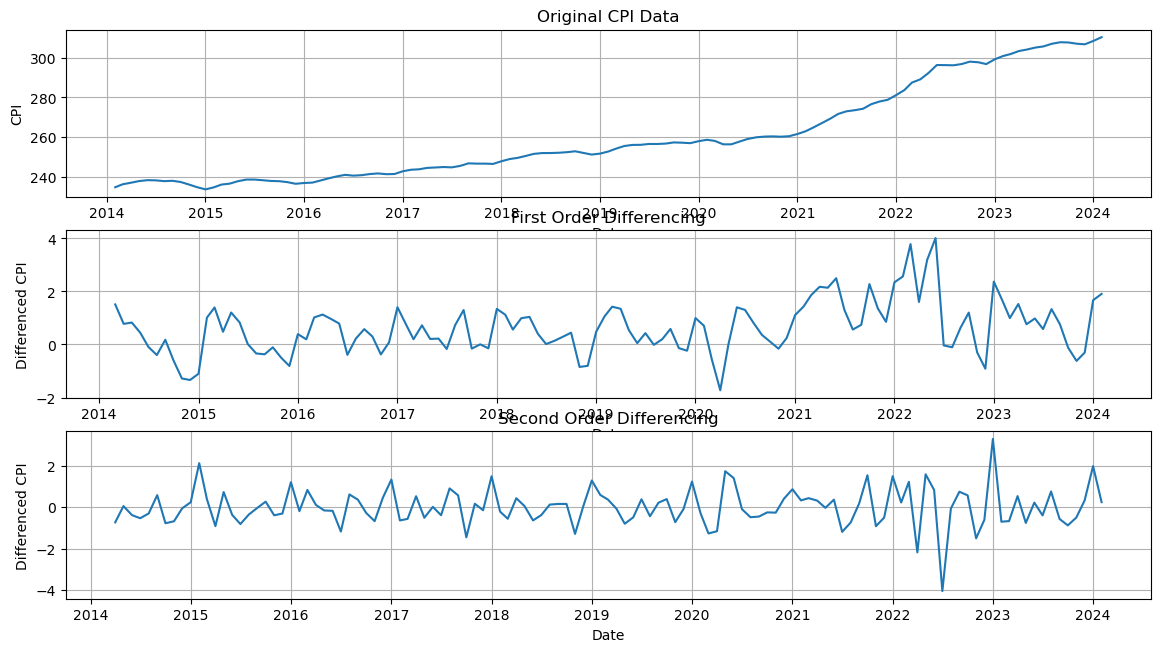

In [24]:
# First order differencing
cpi_diff1 = cpi_data.diff().dropna()

# Second order differencing
cpi_diff2 = cpi_data.diff().diff().dropna()

# Third order differencing
cpi_diff3 = cpi_data.diff().diff().diff().dropna()

# Plotting the original and differenced data
plt.figure(figsize=(14, 10))

# Original data
plt.subplot(4, 1, 1)
plt.plot(cpi_data)
plt.title('Original CPI Data')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.grid(True)

# First order differencing
plt.subplot(4, 1, 2)
plt.plot(cpi_diff1)
plt.title('First Order Differencing')
plt.xlabel('Date')
plt.ylabel('Differenced CPI')
plt.grid(True)

# Second order differencing
plt.subplot(4, 1, 3)
plt.plot(cpi_diff2)
plt.title('Second Order Differencing')
plt.xlabel('Date')
plt.ylabel('Differenced CPI')
plt.grid(True)

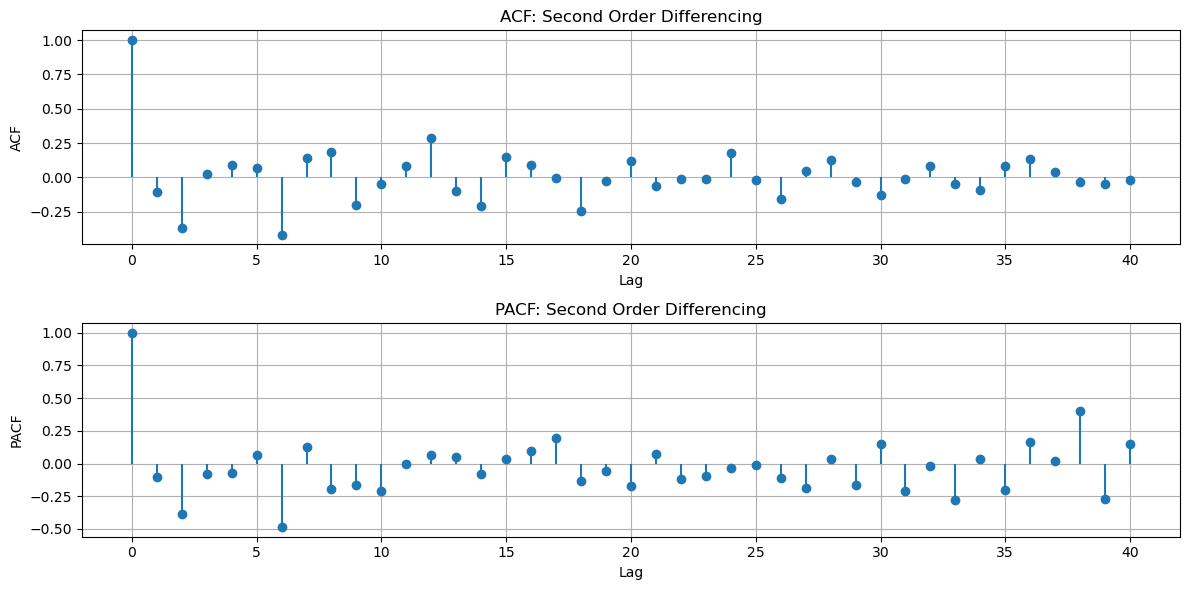

In [30]:
# Calculate ACF and PACF for second order differencing
acf_diff2 = sm.tsa.stattools.acf(cpi_diff2, nlags=40)
pacf_diff2 = sm.tsa.stattools.pacf(cpi_diff2, nlags=40)

# Plot ACF and PACF for second order differencing
plt.figure(figsize=(12, 6))

# Plot ACF
plt.subplot(2, 1, 1)
plt.stem(range(len(acf_diff2)), acf_diff2, markerfmt='o', basefmt=" ", linefmt='-')
plt.title('ACF: Second Order Differencing')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)

# Plot PACF
plt.subplot(2, 1, 2)
plt.stem(range(len(pacf_diff2)), pacf_diff2, markerfmt='o', basefmt=" ", linefmt='-')
plt.title('PACF: Second Order Differencing')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid(True)

plt.tight_layout()
plt.show()

In [35]:
# Fit ARIMA model
order = (1, 2, 1)  # ARIMA(p, d, q) order
arima_model = ARIMA(cpi_data, order=order)
arima_result = arima_model.fit()

# Summary of the model
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:               CPIAUCNS   No. Observations:                  121
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -144.154
Date:                Tue, 19 Mar 2024   AIC                            294.309
Time:                        12:14:37   BIC                            302.646
Sample:                    02-01-2014   HQIC                           297.694
                         - 02-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5208      0.079      6.584      0.000       0.366       0.676
ma.L1         -0.9575      0.024    -39.464      0.000      -1.005      -0.910
sigma2         0.6524      0.079      8.292      0.0

C:\Users\cece\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cece\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cece\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


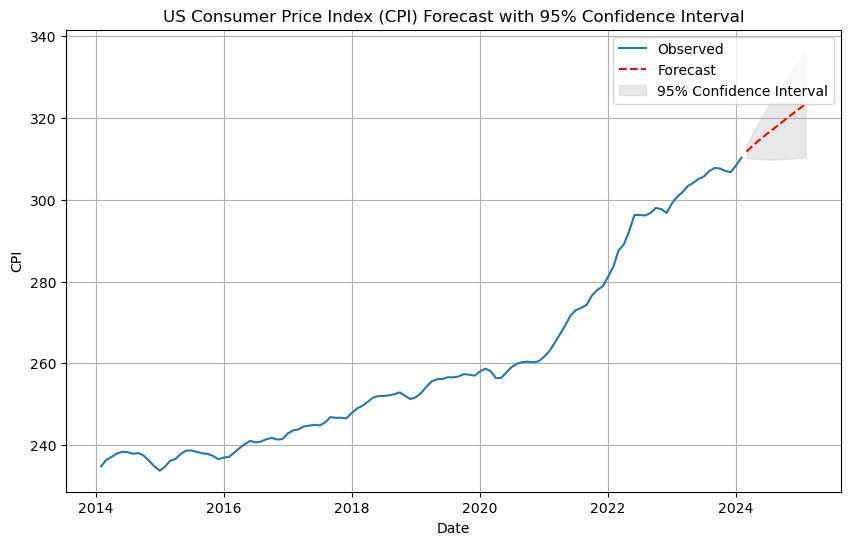

Forecasted CPI values:
2024-03-01    311.806284
2024-04-01    313.063304
2024-05-01    314.204055
2024-06-01    315.284256
2024-07-01    316.332924
2024-08-01    317.365170
2024-09-01    318.388865
2024-10-01    319.408106
2024-11-01    320.425028
2024-12-01    321.440742
2025-01-01    322.455827
2025-02-01    323.470584
Freq: MS, Name: predicted_mean, dtype: float64

Standard errors of the forecasted values:
2024-03-01    0.807725
2024-04-01    1.498963
2024-05-01    2.144796
2024-06-01    2.742838
2024-07-01    3.300343
2024-08-01    3.825968
2024-09-01    4.327309
2024-10-01    4.810435
2024-11-01    5.280028
2024-12-01    5.739660
2025-01-01    6.192056
2025-02-01    6.639306
Freq: MS, Name: var_pred_mean, dtype: float64


In [34]:
# Get forecast result object
forecast_result = arima_result.get_forecast(steps=forecast_periods)

# Extract forecasted values and standard errors
forecast_values = forecast_result.predicted_mean
forecast_standard_errors = forecast_result.se_mean

# Plotting the original data and forecast with error bars
plt.figure(figsize=(10, 6))
plt.plot(cpi_data, label='Observed')
plt.plot(forecast_values, color='red', linestyle='--', label='Forecast')
plt.fill_between(forecast_values.index, 
                 forecast_values - 1.96 * forecast_standard_errors, 
                 forecast_values + 1.96 * forecast_standard_errors, 
                 color='lightgray', alpha=0.5, label='95% Confidence Interval')
plt.title('US Consumer Price Index (CPI) Forecast with 95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()
plt.grid(True)
plt.show()

# Display forecasted values and standard errors
print("Forecasted CPI values:")
print(forecast_values)
print("\nStandard errors of the forecasted values:")
print(forecast_standard_errors)